In [3]:
import os
import pickle
import numpy as np
import pandas as pd
import pyemgpipeline as pep
from matplotlib.figure import SubplotParams

In [4]:
# Function to convert DataFrame to ndarray
def df_to_ndarray(df):
    return df.to_numpy()

# Load the pickled data
pickle_file = r'C:\Users\khush\OneDrive\Desktop\data preprocessing\STRESS CSV\csv_files.pkl'
with open(pickle_file, 'rb') as f:
    csv_files = pickle.load(f)

# Convert DataFrames to ndarrays
all_data = [df_to_ndarray(df) for _, df in csv_files]

In [9]:
# Determine the number of channels
num_channels = all_data[0].shape[1]

# Define sample rate and channel names (adjust as necessary)
sample_rate = 1000
channel_names = ['LT UPPER TRAP', 'RT UPPER TRAP', 'LT MIDDLE TRAP', 'RT MIDDLE TRAP', 'LT LOWER TRAP']



In [10]:
# Plotting parameters
emg_plot_params = pep.plots.EMGPlotParams(
    n_rows=1,
    n_cols=num_channels,  # Use the number of channels
    fig_kwargs={
        'figsize': (16, 1.2),
        'subplotpars': SubplotParams(top=0.7, wspace=0.1, hspace=0),
    },
    line2d_kwargs={
        'color': 'b',
    }
)

In [11]:
# Initialize EMGMeasurementCollection
c = pep.wrappers.EMGMeasurementCollection(
    all_data, 
    hz=sample_rate, 
    trial_names=[os.path.basename(fp) for fp, _ in csv_files], 
    channel_names=channel_names[:num_channels],  # Ensure channel names match number of channels
    emg_plot_params=emg_plot_params
)


Applying DC offset removal...


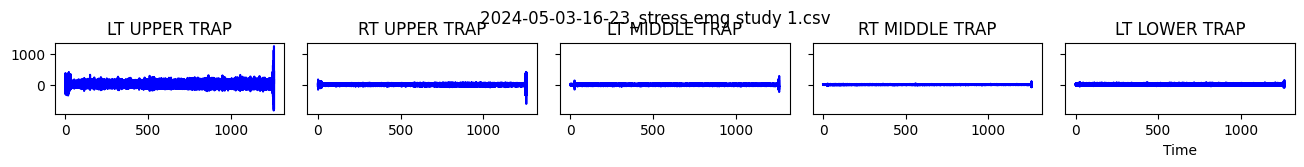

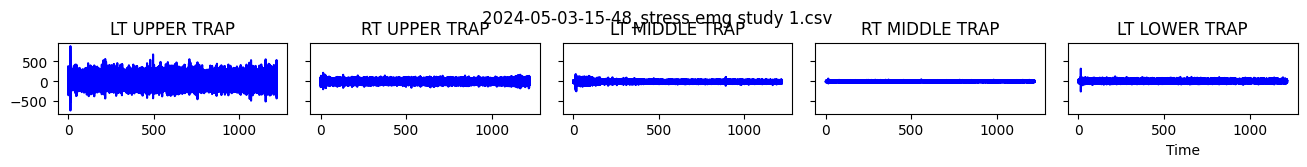

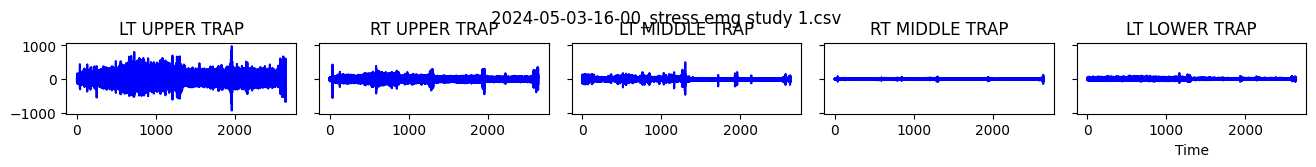

Applying bandpass filtering...


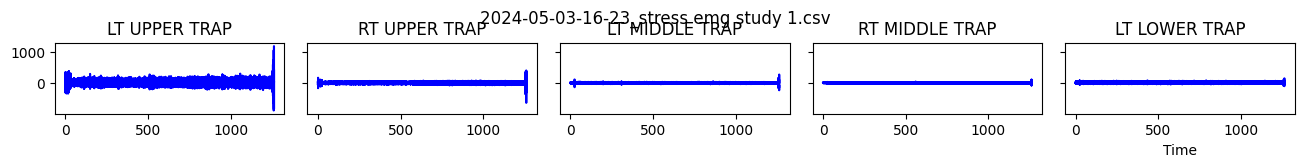

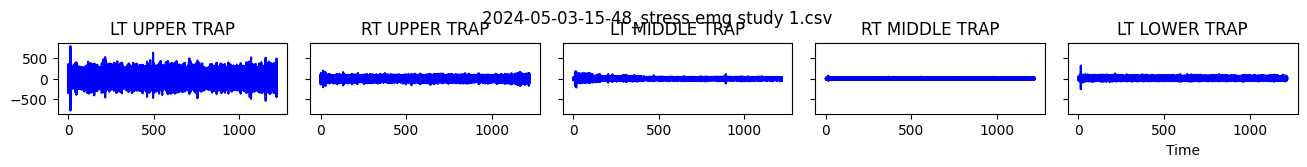

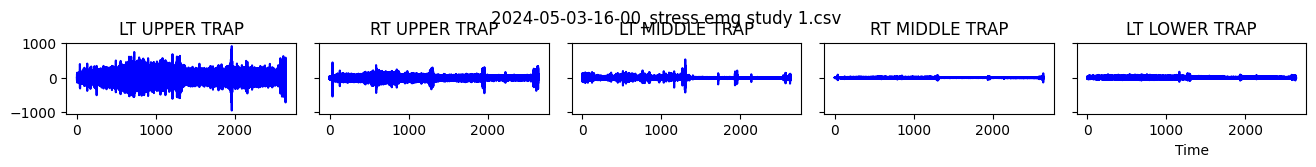

Applying full wave rectification...


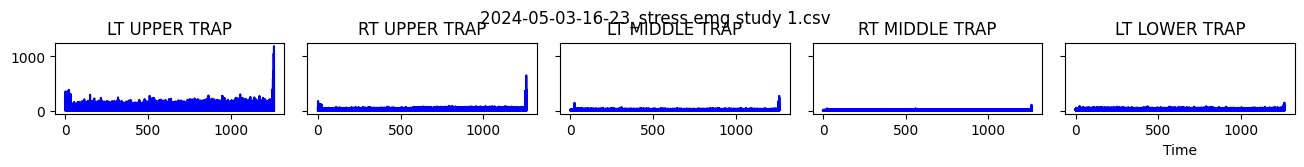

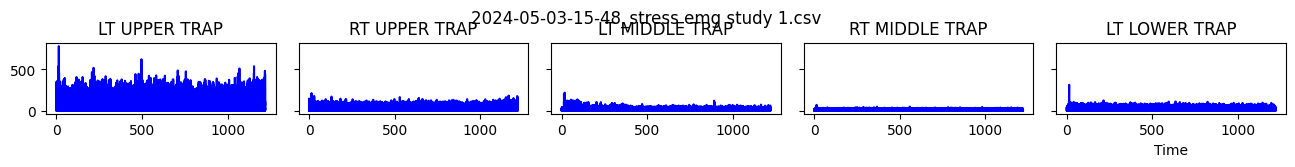

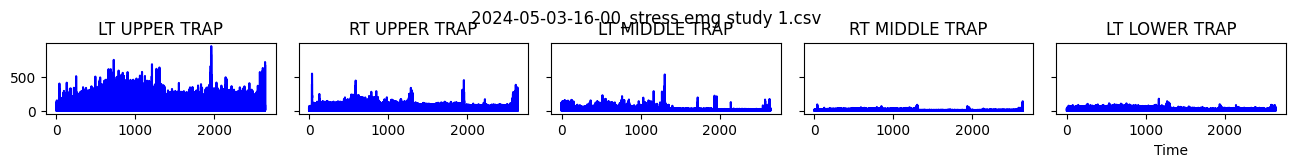

Applying linear envelope...


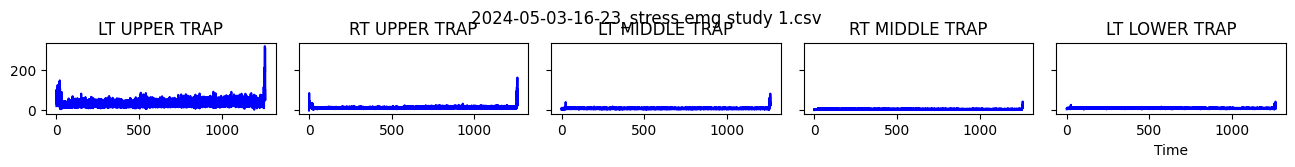

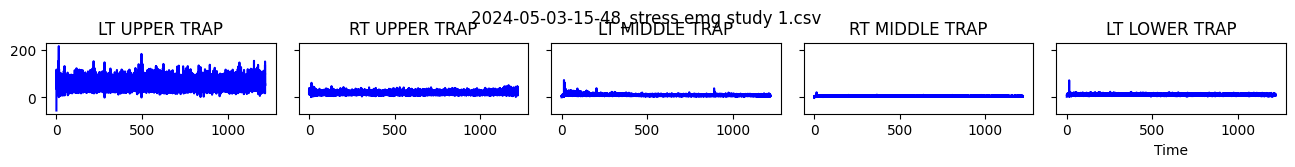

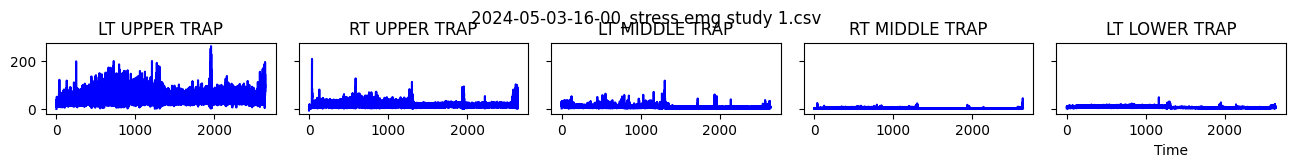

Applying end frame cutting...


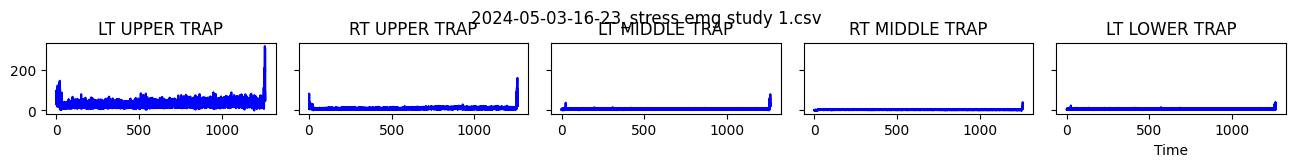

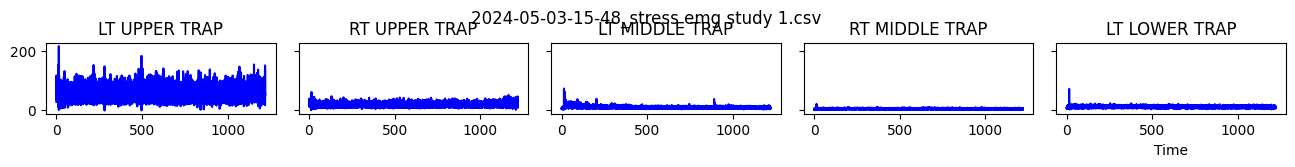

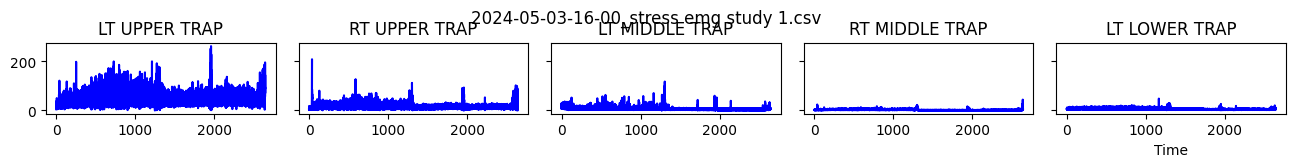

Calculating max amplitude for normalization...
Max Amplitude: [318.97231723 208.73432079 117.88268135  44.27965349  71.94406241]
Applying amplitude normalization...


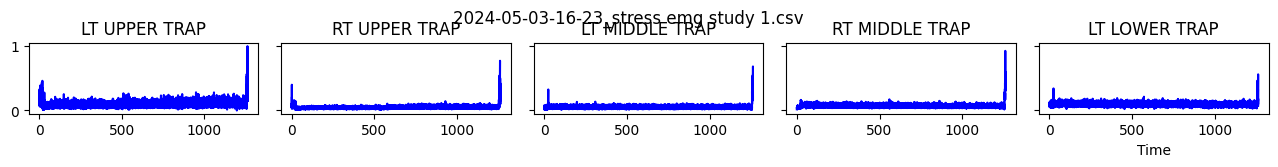

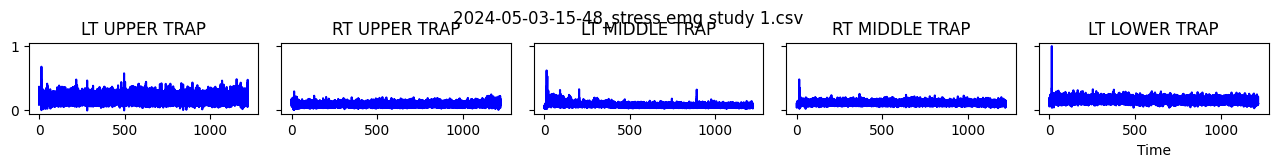

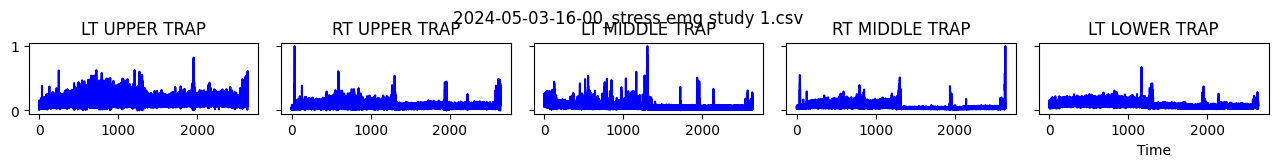

In [12]:
# Step-by-step signal processing
print("Applying DC offset removal...")
c.apply_dc_offset_remover()
c.plot()

print("Applying bandpass filtering...")
c.apply_bandpass_filter(bf_order=4, bf_cutoff_fq_lo=10, bf_cutoff_fq_hi=450)
c.plot()

print("Applying full wave rectification...")
c.apply_full_wave_rectifier()
c.plot()

print("Applying linear envelope...")
c.apply_linear_envelope(le_order=4, le_cutoff_fq=6)
c.plot()

print("Applying end frame cutting...")
c.apply_end_frame_cutter(n_end_frames=30)
c.plot()

print("Calculating max amplitude for normalization...")
max_amplitude = c.find_max_amplitude_of_each_channel_across_trials()
print('Max Amplitude:', max_amplitude)

print("Applying amplitude normalization...")
c.apply_amplitude_normalizer(max_amplitude)
c.plot()

Applying segmentation...


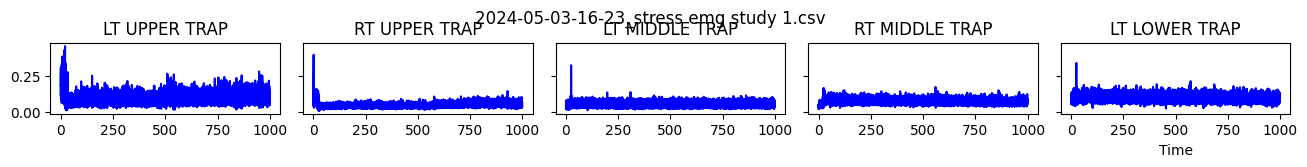

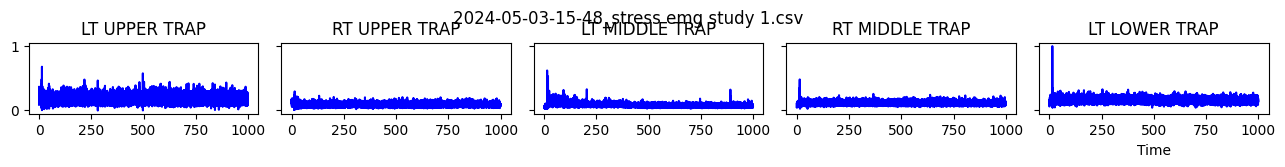

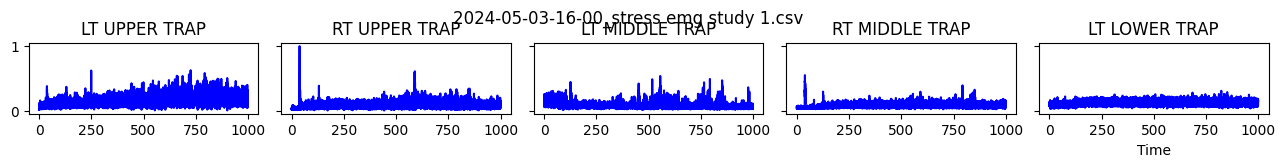

In [13]:
# Segmentation parameters (assuming whole range for simplicity)
all_beg_ts = [0 for _ in range(len(all_data))]
all_end_ts = [999 for _ in range(len(all_data))]

print("Applying segmentation...")
c.apply_segmenter(all_beg_ts, all_end_ts)
c.plot()

In [14]:
# Access processed data
processed_data = c.all_data

In [15]:
# Save the processed data back to a new pickle file
processed_pickle_file = r'C:\Users\khush\OneDrive\Desktop\data preprocessing\STRESS CSV\processed_csv_files.pkl'
with open(processed_pickle_file, 'wb') as f:
    pickle.dump(processed_data, f)

print("Processed data saved to:", processed_pickle_file)

# Optionally, save processed data to CSV files
all_csv_paths = [os.path.join(r'C:\Users\khush\OneDrive\Desktop\data preprocessing\STRESS CSV', f'processed_{os.path.basename(fp)}') for fp, _ in csv_files]
c.export_csv(all_csv_paths)

Processed data saved to: C:\Users\khush\OneDrive\Desktop\data preprocessing\STRESS CSV\processed_csv_files.pkl
